In [1]:
import cellular_automata as ca
import matplotlib.pyplot as plt

In [2]:
def simulate_tumor_growth(time_delay, generations, rows, cols, phi, rho, k1, k2, k3, k4, cancer_init_positions, origin):
    history = {}
    M = ca.initialize_grid(rows, cols, cancer_init_positions)

    for g in range(generations):
        M = ca.simulate_tumor_growth_one_step(M, g, time_delay, history, phi, rho, k1, k2, k3, k4, origin, rows, cols)

    return history


In [8]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85

In [9]:
history_no_delay = simulate_tumor_growth(0, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

In [12]:
# time delay = 7
history_delay = simulate_tumor_growth(7, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

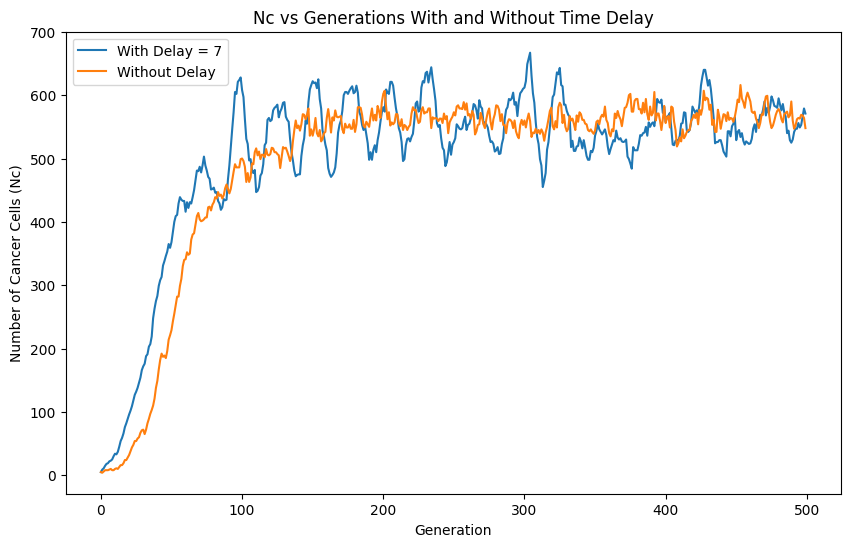

In [14]:
generations = list(range(GENERATIONS))
Nc_with_delay = [history_delay[g]['Nc'] for g in generations]
Nc_without_delay = [history_no_delay[g]['Nc'] for g in generations]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generations, Nc_with_delay, label='With Delay = 7')
plt.plot(generations, Nc_without_delay, label='Without Delay')
plt.xlabel('Generation')
plt.ylabel('Number of Cancer Cells (Nc)')
plt.title('Nc vs Generations With and Without Time Delay')
plt.legend()
plt.show()
